<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/decisiontree_pyinb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = {'age':['Junior','Youth','Middle','Senior','Youth','Middle','Senior','Middle','Junior'],
      'income':['low','high','low','low','high','high','high','low','low'],
      'credit':['bad','fair','excellent','excellent','fair','excellent','bad','fair','bad'],
      'loan_buy_car':['no','yes','yes','yes','no','yes','no','no','no']
      }

A **Decision Tree** is a flowchart-like structure where each internal node represents a "test" on an attribute (e.g., whether a person's age is 'Senior'), each branch represents the outcome of the test, and each leaf node represents a class label (the decision taken after computing all attributes). The paths from the root to a leaf represent classification rules.

Here's a breakdown of how it works and its components:

1.  **Root Node:** The topmost node in the tree. It represents the initial feature that the tree uses to split the data.
2.  **Internal Nodes:** Each internal node represents a feature test that leads to further splits in the data.
3.  **Branches:** The outcomes of the feature tests are represented by branches, connecting nodes.
4.  **Leaf Nodes:** The terminal nodes of the tree, which represent the final decision or class label.

**How it learns:**
The algorithm works by recursively partitioning the dataset into smaller subsets. At each step, it chooses the feature that best splits the data to make the subsets as 'pure' as possible in terms of the target variable. This process continues until a stopping criterion is met (e.g., all samples in a subset belong to the same class, or the maximum depth of the tree is reached).

Let's visualize the decision tree that was just fitted to your data to see its structure and decision-making process.

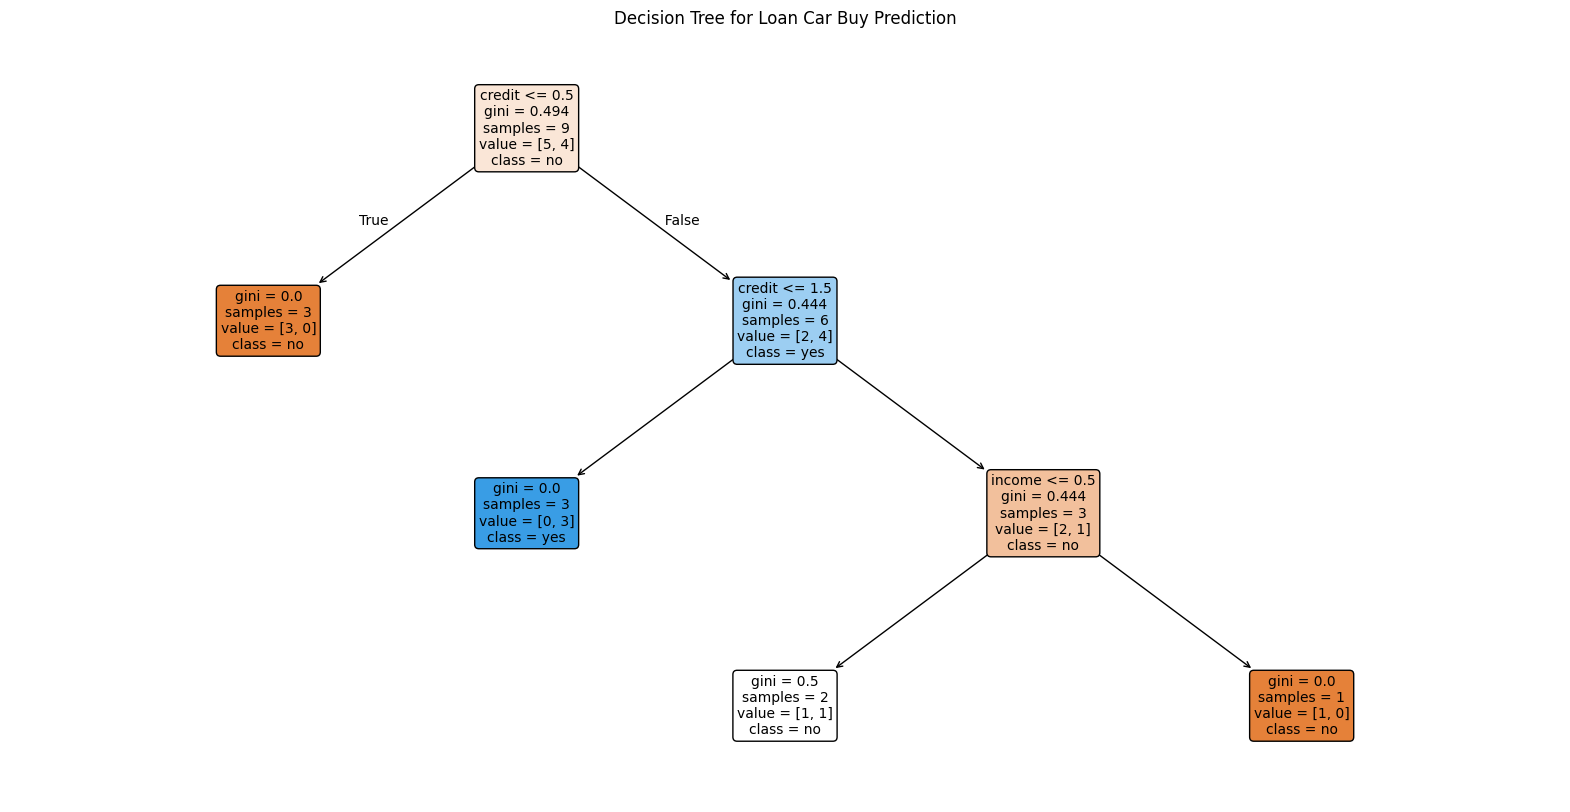

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Re-define df (as it was not executed prior to X being defined)
df_data = {'age':['Junior','Youth','Middle','Senior','Youth','Middle','Senior','Middle','Junior'],
      'income':['low','high','low','low','high','high','high','low','low'],
      'credit':['bad','fair','excellent','excellent','fair','excellent','bad','fair','bad'],
      'loan_buy_car':['no','yes','yes','yes','no','yes','no','no','no']
      }
df = pd.DataFrame(df_data)

# Encode the DataFrame (as df_encoded was not executed prior)
df_encoded = df.apply(lambda col: col.astype('category').cat.codes)

# Define X and y (as they were not executed prior)
X = df_encoded.drop('loan_buy_car',axis=1)
y = df_encoded['loan_buy_car']

# Instantiate and fit the model (as it was not executed prior)
model = DecisionTreeClassifier()
model.fit(X,y)

# Get feature names from X (encoded DataFrame columns)
feature_names = X.columns.tolist()

# Get class names from y (loan_buy_car categories)
class_names_mapping = dict(enumerate(df['loan_buy_car'].astype('category').cat.categories))
class_names = [class_names_mapping[i] for i in sorted(class_names_mapping.keys())]

plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Loan Car Buy Prediction")
plt.show()

## Understanding Entropy

**Entropy** is a measure of the randomness or impurity in a set of examples. In the context of decision trees, it quantifies the uncertainty of a target variable within a node. The higher the entropy, the more mixed or impure the data is; the lower the entropy, the more pure (homogeneous) the data is.

**Key Characteristics:**
*   **Range:** For binary classification, Entropy ranges from 0 to 1. A node with an Entropy of 0 is perfectly pure (all samples belong to the same class), while an Entropy of 1 (for binary classification with equal class distribution) indicates perfect impurity.
*   **Goal:** Decision tree algorithms aim to reduce the entropy at each split, meaning they try to create child nodes that are as pure as possible.

**How it's Calculated:**
For a given node with `C` classes, the Entropy is calculated as:

$Entropy = - \sum_{i=1}^{C} p_i \log_2(p_i)$

Where:
*   $p_i$ is the proportion of samples belonging to class $i$ in the node.
*   If $p_i = 0$, then $p_i \log_2(p_i)$ is considered 0.

**Information Gain:**
Just like with Gini Index, when splitting a node, we use **Information Gain** to evaluate the quality of a split. Information Gain is the reduction in entropy achieved by that split.

$Information~Gain = Entropy_{parent} - \sum_{j=1}^{k} (\frac{N_j}{N}) Entropy_{child~j}$

Where:
*   $Entropy_{parent}$ is the Entropy of the parent node.
*   $k$ is the number of child nodes.
*   $N_j$ is the number of samples in child node $j$.
*   $N$ is the total number of samples in the parent node.
*   $Entropy_{child~j}$ is the Entropy of child node $j$.

A split with higher Information Gain is preferred because it leads to a greater reduction in uncertainty.

Let's calculate Entropy with some examples.

In [4]:
import numpy as np

def calculate_entropy(counts):
    """
    Calculates the Entropy for a given set of class counts.
    counts: A list or numpy array of integers, where each element is the count
            of samples belonging to a particular class.
    """
    total_samples = np.sum(counts)
    if total_samples == 0:
        return 0.0 # Handle empty node case

    entropy = 0.0
    for count in counts:
        probability = count / total_samples
        if probability > 0:
            entropy -= probability * np.log2(probability)
    return entropy

# Example 1: A perfectly pure node (all samples in one class)
# 9 'yes' and 0 'no'
class_counts_pure = [9, 0]
entropy_pure = calculate_entropy(class_counts_pure)
print(f"Entropy for pure node (9 yes, 0 no): {entropy_pure:.4f}")

# Example 2: An impure node (mixed classes)
# 5 'yes' and 4 'no'
class_counts_impure = [5, 4]
entropy_impure = calculate_entropy(class_counts_impure)
print(f"Entropy for impure node (5 yes, 4 no): {entropy_impure:.4f}")

# Example 3: A perfectly impure node (for binary classification with equal distribution)
# 5 'yes' and 5 'no' (hypothetical for 10 samples)
class_counts_perfectly_impure = [5, 5]
entropy_perfectly_impure = calculate_entropy(class_counts_perfectly_impure)
print(f"Entropy for perfectly impure node (5 yes, 5 no): {entropy_perfectly_impure:.4f}")


# Let's reconsider the split scenario for 'loan_buy_car' using Entropy
# Original data: 4 'yes', 5 'no'

original_counts = [4, 5]
parent_entropy = calculate_entropy(original_counts)
print(f"\nParent Node Entropy (4 'yes', 5 'no'): {parent_entropy:.4f}")

# Hypothetical split 1: By 'age' == 'Junior'
# 'Junior' leads to: 1 'yes', 2 'no'
# Remaining (not 'Junior') leads to: 3 'yes', 3 'no'

child1_counts = [1, 2]
child2_counts = [3, 3]

entropy_child1 = calculate_entropy(child1_counts)
entropy_child2 = calculate_entropy(child2_counts)

weighted_entropy_split1 = (np.sum(child1_counts) / np.sum(original_counts)) * entropy_child1 + \
                          (np.sum(child2_counts) / np.sum(original_counts)) * entropy_child2

information_gain_split1 = parent_entropy - weighted_entropy_split1

print(f"\nSplit by 'age' == 'Junior':")
print(f"  Child 1 (Junior) Entropy: {entropy_child1:.4f} (1 yes, 2 no)")
print(f"  Child 2 (Not Junior) Entropy: {entropy_child2:.4f} (3 yes, 3 no)")
print(f"  Weighted Entropy after split: {weighted_entropy_split1:.4f}")
print(f"  Information Gain: {information_gain_split1:.4f}")

# Hypothetical split 2: By 'credit' == 'excellent'
# 'excellent' leads to: 2 'yes', 0 'no'
# Remaining (not 'excellent') leads to: 2 'yes', 5 'no'

child3_counts = [2, 0]
child4_counts = [2, 5]

entropy_child3 = calculate_entropy(child3_counts)
entropy_child4 = calculate_entropy(child4_counts)

weighted_entropy_split2 = (np.sum(child3_counts) / np.sum(original_counts)) * entropy_child3 + \
                          (np.sum(child4_counts) / np.sum(original_counts)) * entropy_child4

information_gain_split2 = parent_entropy - weighted_entropy_split2

print(f"\nSplit by 'credit' == 'excellent':")
print(f"  Child 3 (excellent) Entropy: {entropy_child3:.4f} (2 yes, 0 no)")
print(f"  Child 4 (not excellent) Entropy: {entropy_child4:.4f} (2 yes, 5 no)")
print(f"  Weighted Entropy after split: {weighted_entropy_split2:.4f}")
print(f"  Information Gain: {information_gain_split2:.4f}")

# Comparing the two splits, the split with a higher Information Gain is preferred.

Entropy for pure node (9 yes, 0 no): 0.0000
Entropy for impure node (5 yes, 4 no): 0.9911
Entropy for perfectly impure node (5 yes, 5 no): 1.0000

Parent Node Entropy (4 'yes', 5 'no'): 0.9911

Split by 'age' == 'Junior':
  Child 1 (Junior) Entropy: 0.9183 (1 yes, 2 no)
  Child 2 (Not Junior) Entropy: 1.0000 (3 yes, 3 no)
  Weighted Entropy after split: 0.9728
  Information Gain: 0.0183

Split by 'credit' == 'excellent':
  Child 3 (excellent) Entropy: 0.0000 (2 yes, 0 no)
  Child 4 (not excellent) Entropy: 0.8631 (2 yes, 5 no)
  Weighted Entropy after split: 0.6713
  Information Gain: 0.3198


The **Gini Index** (or Gini impurity) is a measure of impurity or disorder used in decision tree algorithms, particularly CART (Classification and Regression Trees), to decide how to split nodes. It quantifies how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset.

**Key Characteristics:**
*   **Range:** The Gini index ranges from 0 to 0.5. A Gini index of 0 means the node is perfectly pure (all samples belong to the same class), and a Gini index of 0.5 (for a binary classification problem with equal class distribution) means the node is perfectly impure (samples are equally distributed among different classes).
*   **Goal:** Decision tree algorithms aim to minimize the Gini index at each split, meaning they try to create child nodes that are as pure as possible.

**How it's Calculated:**
For a given node with `C` classes, the Gini index is calculated as:

$Gini = 1 - \sum_{i=1}^{C} (p_i)^2$

Where:
*   $p_i$ is the proportion of samples belonging to class $i$ in the node.
*   $\sum_{i=1}^{C} (p_i)^2$ is the sum of the squared probabilities of each class.

**Gini Gain:**
When splitting a node, we calculate the Gini index for the parent node and the weighted Gini index for the child nodes. The **Gini Gain** (or impurity reduction) is used to evaluate the quality of a split. A higher Gini Gain means a better split.

$Gini~Gain = Gini_{parent} - \sum_{j=1}^{k} (\frac{N_j}{N}) Gini_{child~j}$

Where:
*   $Gini_{parent}$ is the Gini index of the parent node.
*   $k$ is the number of child nodes (typically 2 for binary splits).
*   $N_j$ is the number of samples in child node $j$.
*   $N$ is the total number of samples in the parent node.
*   $Gini_{child~j}$ is the Gini index of child node $j$.

Let's look at an example to calculate the Gini index.

In [3]:
import numpy as np

def calculate_gini_index(counts):
    """
    Calculates the Gini index for a given set of class counts.
    counts: A list or numpy array of integers, where each element is the count
            of samples belonging to a particular class.
    """
    total_samples = np.sum(counts)
    if total_samples == 0:
        return 0.0 # Handle empty node case

    gini = 1.0
    for count in counts:
        probability = count / total_samples
        gini -= probability**2
    return gini

# Example 1: A perfectly pure node (all samples in one class)
# 9 'yes' and 0 'no' (e.g., loan_buy_car: ['yes', 'yes', ..., 'yes'])
class_counts_pure = [9, 0]
gini_pure = calculate_gini_index(class_counts_pure)
print(f"Gini Index for pure node (9 yes, 0 no): {gini_pure:.4f}")

# Example 2: An impure node (mixed classes)
# 5 'yes' and 4 'no' (e.g., loan_buy_car: ['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no'])
class_counts_impure = [5, 4]
gini_impure = calculate_gini_index(class_counts_impure)
print(f"Gini Index for impure node (5 yes, 4 no): {gini_impure:.4f}")

# Example 3: A perfectly impure node (for binary classification with equal distribution)
# 5 'yes' and 5 'no' (hypothetical for 10 samples)
class_counts_perfectly_impure = [5, 5]
gini_perfectly_impure = calculate_gini_index(class_counts_perfectly_impure)
print(f"Gini Index for perfectly impure node (5 yes, 5 no): {gini_perfectly_impure:.4f}")


# Let's consider a split scenario for 'loan_buy_car'
# Original data (from df['loan_buy_car']):
# ['no','yes','yes','yes','no','yes','no','no','no']
# Counts: 'yes': 4, 'no': 5

original_counts = [4, 5] # [count_yes, count_no]
parent_gini = calculate_gini_index(original_counts)
print(f"\nParent Node Gini Index (4 'yes', 5 'no'): {parent_gini:.4f}")

# Hypothetical split 1: By 'age' == 'Junior'
# Assume 'Junior' leads to: 1 'yes', 2 'no'
# Remaining (not 'Junior') leads to: 3 'yes', 3 'no'

child1_counts = [1, 2] # Junior: 1 'yes', 2 'no'
child2_counts = [3, 3] # Not Junior: 3 'yes', 3 'no'

gini_child1 = calculate_gini_index(child1_counts)
gini_child2 = calculate_gini_index(child2_counts)

weighted_gini_split1 = (np.sum(child1_counts) / np.sum(original_counts)) * gini_child1 + \
                       (np.sum(child2_counts) / np.sum(original_counts)) * gini_child2

gini_gain_split1 = parent_gini - weighted_gini_split1

print(f"\nSplit by 'age' == 'Junior':")
print(f"  Child 1 (Junior) Gini: {gini_child1:.4f} (1 yes, 2 no)")
print(f"  Child 2 (Not Junior) Gini: {gini_child2:.4f} (3 yes, 3 no)")
print(f"  Weighted Gini after split: {weighted_gini_split1:.4f}")
print(f"  Gini Gain: {gini_gain_split1:.4f}")

# Hypothetical split 2: By 'credit' == 'excellent'
# Assume 'excellent' leads to: 2 'yes', 0 'no'
# Remaining (not 'excellent') leads to: 2 'yes', 5 'no'

child3_counts = [2, 0] # excellent: 2 'yes', 0 'no'
child4_counts = [2, 5] # not excellent: 2 'yes', 5 'no'

gini_child3 = calculate_gini_index(child3_counts)
gini_child4 = calculate_gini_index(child4_counts)

weighted_gini_split2 = (np.sum(child3_counts) / np.sum(original_counts)) * gini_child3 + \
                       (np.sum(child4_counts) / np.sum(original_counts)) * gini_child4

gini_gain_split2 = parent_gini - weighted_gini_split2

print(f"\nSplit by 'credit' == 'excellent':")
print(f"  Child 3 (excellent) Gini: {gini_child3:.4f} (2 yes, 0 no)")
print(f"  Child 4 (not excellent) Gini: {gini_child4:.4f} (2 yes, 5 no)")
print(f"  Weighted Gini after split: {weighted_gini_split2:.4f}")
print(f"  Gini Gain: {gini_gain_split2:.4f}")


# Comparing the two splits, the split with a higher Gini Gain is preferred.

Gini Index for pure node (9 yes, 0 no): 0.0000
Gini Index for impure node (5 yes, 4 no): 0.4938
Gini Index for perfectly impure node (5 yes, 5 no): 0.5000

Parent Node Gini Index (4 'yes', 5 'no'): 0.4938

Split by 'age' == 'Junior':
  Child 1 (Junior) Gini: 0.4444 (1 yes, 2 no)
  Child 2 (Not Junior) Gini: 0.5000 (3 yes, 3 no)
  Weighted Gini after split: 0.4815
  Gini Gain: 0.0123

Split by 'credit' == 'excellent':
  Child 3 (excellent) Gini: 0.0000 (2 yes, 0 no)
  Child 4 (not excellent) Gini: 0.4082 (2 yes, 5 no)
  Weighted Gini after split: 0.3175
  Gini Gain: 0.1764


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(df)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
df_encoded = df.apply(lambda col: col.astype('category').cat.codes)

<h1> Important</h1>
<b>ENcoding</b>
Certainly! The code lambda col: col.astype('category').cat.codes is a lambda function that transforms a column (col) in a pandas DataFrame. Here's a breakdown of what it does:

lambda col:: This defines an anonymous function that takes a single argument, which is expected to be a pandas Series (a column from a DataFrame).
col.astype('category'): This converts the Series (column) to a categorical data type. Pandas categorical type is efficient for storing string columns that have a limited number of unique values. It assigns an internal numerical code to each unique category.
.cat.codes: After the column is converted to a categorical type, the .cat accessor is used to access properties specific to categorical data. .codes then retrieves the underlying numerical representation of these categories. Each unique string value is mapped to an integer code, making the column suitable for machine learning models that require numerical input.
In summary, this lambda function converts a column of non-numeric data (like strings) into numerical codes by treating its unique values as categories.

In [ ]:
X = df_encoded.drop('loan_buy_car',axis=1)

In [ ]:
y = df_encoded['loan_buy_car']

In [ ]:
model.fit(X,y)

DecisionTreeClassifier()

In [ ]:
df.head()

,age,income,credit,loan_buy_car
0,Junior,low,bad,no
1,Youth,high,fair,yes
2,Middle,low,excellent,yes
3,Senior,low,excellent,yes
4,Youth,high,fair,no


In [ ]:
df_encoded

,age,income,credit,loan_buy_car
0,0,1,0,0
1,3,0,2,1
2,1,1,1,1
3,2,1,1,1
4,3,0,2,0
5,1,0,1,1
6,2,0,0,0
7,1,1,2,0
8,0,1,0,0


In [ ]:
feature = [2,2,1]
pred = model.predict([feature])
print(f"Value : {pred[0]}")

Value : 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
